<a href="https://colab.research.google.com/github/rezanbt/iran-power-electricity-prediction/blob/main/Energy_Consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
training_data = pd.read_csv('https://raw.githubusercontent.com/rezanbt/iran-power-electricity-prediction/main/IranPowerConsum_Train.csv')

training_data.shape
training_data.head()

,Date,EnegryConsum
0,2011-03-21 01:00:00.000,20808
1,2011-03-21 02:00:00.000,20098
2,2011-03-21 03:00:00.000,19306
3,2011-03-21 04:00:00.000,18339
4,2011-03-21 05:00:00.000,17646


In [25]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,EnegryConsum
0,20808
1,20098
2,19306
3,18339
4,17646


In [26]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)


In [27]:
# Getting the inputs and outputs

x_train = training_data[0:76990]
y_train = training_data[1:76991]

print(x_train.shape)
print(y_train.shape)


(76990, 1)
(76990, 1)


In [28]:
# reshaping

x_train = np.reshape(x_train, (76990, 1, 1))

print(x_train.shape)

(76990, 1, 1)


In [29]:
# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


Using Tensorflow backend

In [30]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)


Epoch 1/200
2406/2406 [==============================] - 18s 6ms/step - loss: 0.0022
Epoch 2/200
2406/2406 [==============================] - 7s 3ms/step - loss: 1.5331e-04
Epoch 3/200
2406/2406 [==============================] - 6s 2ms/step - loss: 1.3547e-04
Epoch 4/200
2406/2406 [==============================] - 6s 2ms/step - loss: 1.3569e-04
Epoch 5/200
2406/2406 [==============================] - 6s 2ms/step - loss: 1.3513e-04
Epoch 6/200
2406/2406 [==============================] - 6s 2ms/step - loss: 1.3529e-04
Epoch 7/200
2406/2406 [==============================] - 5s 2ms/step - loss: 1.3530e-04
Epoch 8/200
2406/2406 [==============================] - 6s 2ms/step - loss: 1.3547e-04
Epoch 9/200
2406/2406 [==============================] - 6s 2ms/step - loss: 1.3601e-04
Epoch 10/200
2406/2406 [==============================] - 6s 2ms/step - loss: 1.3541e-04
Epoch 11/200
2406/2406 [==============================] - 6s 2ms/step - loss: 1.3517e-04
Epoch 12/200
2406/2406 [=========

In [31]:
# getting the real energy of 2017 i.e., importing the test dataset

test_data = pd.read_csv('https://raw.githubusercontent.com/rezanbt/iran-power-electricity-prediction/main/IranPowerConsum_Test.csv')
real_energy_consumption = test_data.iloc[:,1:2]
real_energy_consumption.head()


,EnegryConsum
0,31748
1,30206
2,28829
3,28451
4,28095


In [32]:
# getting the predicted energy consumption of 2017

inputs = real_energy_consumption
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (19441, 1, 1))


predicted_energy_consumption= model.predict(inputs)
predicted_energy_consumption= mm.inverse_transform(predicted_energy_consumption)


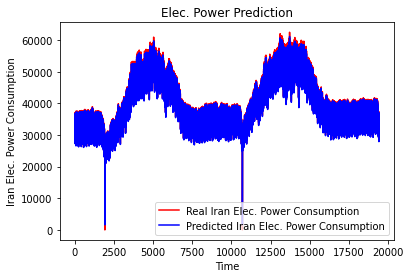

In [33]:
# visualizing the results

plt.plot(real_energy_consumption, color = 'red', label = 'Real Iran Elec. Power Consumption')
plt.plot(predicted_energy_consumption, color = 'blue', label = 'Predicted Iran Elec. Power Consumption')
plt.title('Elec. Power Prediction')
plt.xlabel('Time')
plt.ylabel('Iran Elec. Power Consumption')
plt.legend()
plt.show()

In [34]:
# getting the real energy consumption of 2012 - 2016

training_data = pd.read_csv('https://raw.githubusercontent.com/rezanbt/iran-power-electricity-prediction/main/IranPowerConsum_Train.csv')

training_data.shape
training_data.head()

,Date,EnegryConsum
0,2011-03-21 01:00:00.000,20808
1,2011-03-21 02:00:00.000,20098
2,2011-03-21 03:00:00.000,19306
3,2011-03-21 04:00:00.000,18339
4,2011-03-21 05:00:00.000,17646


In [35]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,EnegryConsum
0,20808
1,20098
2,19306
3,18339
4,17646


In [36]:
# getting the predicted energy consumption of 2012-2016

predicted_energy_consumption = model.predict(x_train)
predicted_energy_consumption = mm.inverse_transform(predicted_energy_consumption)

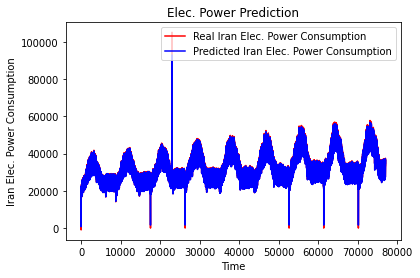

In [37]:
# visualizing the whole training data results

plt.plot(training_data, color = 'red', label = 'Real Iran Elec. Power Consumption')
plt.plot(predicted_energy_consumption, color = 'blue', label = 'Predicted Iran Elec. Power Consumption')
plt.title('Elec. Power Prediction')
plt.xlabel('Time')
plt.ylabel('Iran Elec. Power Consumption')
plt.legend()
plt.show()

In [38]:
# Evaluating the RNN model

import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_energy_consumption, predicted_energy_consumption))

print(rmse)

ValueError: ignored